# Logistic Regression: A Complete Guide

This notebook provides a comprehensive introduction to logistic regression, covering:
1. Mathematical foundations
2. Implementation using scikit-learn
3. Building logistic regression from scratch

## 1. Mathematical Foundations of Logistic Regression

### 1.1 Why Logistic Regression?

While linear regression works well for predicting continuous values, it's not suitable for classification problems. Logistic regression extends linear regression to handle binary classification tasks.

### 1.2 The Logistic Function (Sigmoid)

The core of logistic regression is the logistic (sigmoid) function:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

This function maps any real-valued input to a value between 0 and 1, making it perfect for probability estimation.

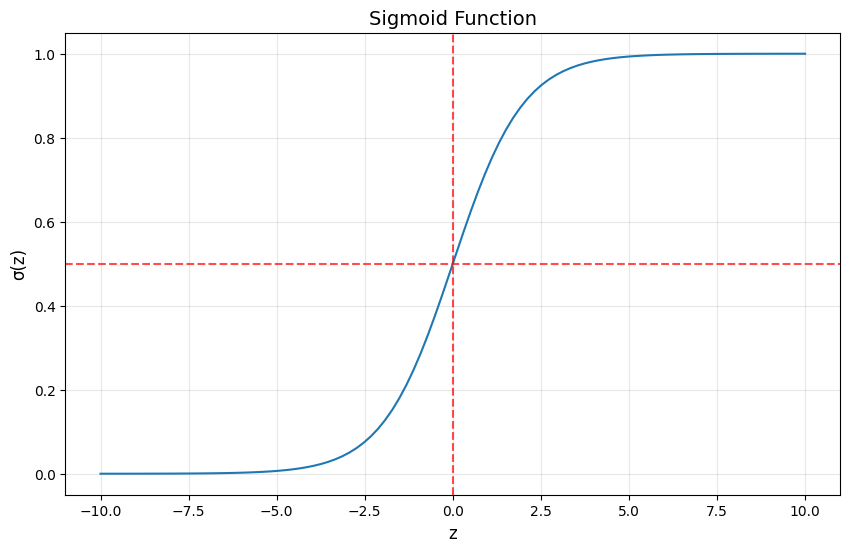

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Visualize the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) # 0.0, 0.1, 0.2, 0.3 , 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0 

z = np.linspace(-10, 10, 100)
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid(z))
plt.grid(True, alpha=0.3)
plt.xlabel('z', fontsize=12)
plt.ylabel('σ(z)', fontsize=12)
plt.title('Sigmoid Function', fontsize=14)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.7)
plt.show()

### 1.3 The Logistic Regression Model

In logistic regression, we model the probability of the positive class (y=1) as:

$$P(y=1|x) = \sigma(w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$$

Where:
- $w$ is the weight vector
- $x$ is the feature vector
- $b$ is the bias term
- $w^T x + b$ is the linear combination (similar to linear regression)

### 1.4 Cost Function

We use the binary cross-entropy (log loss) as our cost function:

$$J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1-y^{(i)}) \log(1-\hat{y}^{(i)})]$$

``` python
loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
```
Where:
- $m$ is the number of training examples
- $y^{(i)}$ is the actual label of the $i$-th example
- $\hat{y}^{(i)}$ is the predicted probability for the $i$-th example

### 1.5 Gradient Descent

To minimize the cost function, we use gradient descent. The gradients are:

$$\frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) x_j^{(i)}$$

$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})$$

The update rules are:

$$w := w - \alpha \frac{\partial J}{\partial w}$$
$$b := b - \alpha \frac{\partial J}{\partial b}$$


If w and b were considered as a single parameter matrix in the vectorized form, then we would write the derivative as 

### **Gradient of the Loss w\.r.t. Parameters $\beta$:**

We take derivative of the loss $\mathcal{L}$ with respect to $\beta$:

$$
\frac{\partial \mathcal{L}}{\partial \beta} = X^T (\hat{y} - y)
$$

Where:

* $\hat{y} = \sigma(X\beta)$
* $y$ is the vector of true labels


## 2. Implementation Using Scikit-Learn

Let's implement logistic regression using scikit-learn on a synthetic dataset.

In [26]:
# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                          n_redundant=5, random_state=42, n_classes=2)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train) # training 

# Make predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.825

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       106
           1       0.82      0.81      0.81        94

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



/Users/lexai/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/lexai/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/lexai/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/lexai/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/lexai/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_s

In [37]:
log_reg.predict_proba(X_test_scaled)[:,1] < 0.5

/Users/lexai/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/lexai/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/lexai/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


array([ True, False,  True,  True, False, False,  True,  True, False,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False,  True, False, False,  True,  True, False,
       False,  True,  True, False, False, False,  True,  True, False,
        True, False,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True, False, False,  True, False,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False,  True, False, False,  True,  True, False, False,
       False, False,

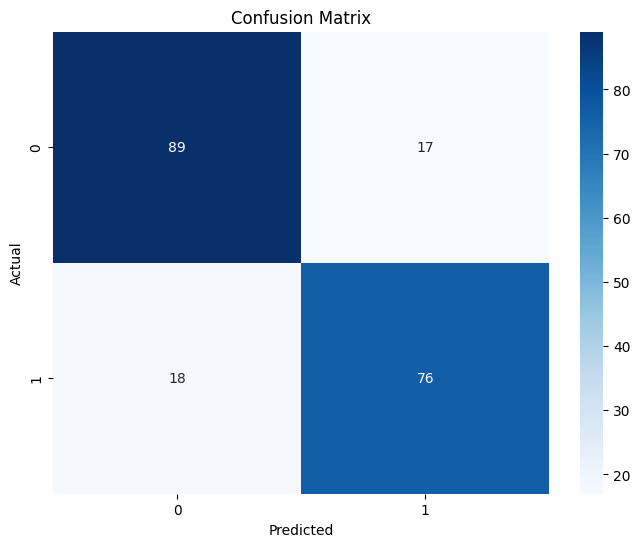

In [9]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
#from sklearn.metrics import roc_curve, auc

#fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
#roc_auc = auc(fpr, tpr)

#plt.figure(figsize=(8, 6))
#plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
#plt.legend(loc="lower right")
#plt.show()

## 3. Logistic Regression from Scratch

Now let's implement logistic regression from scratch to better understand how it works.

In [27]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.losses = []
        
    def _sigmoid(self, z):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-z))
    
    def _compute_loss(self, y_true, y_pred):
        """Compute binary cross-entropy loss"""
        # Clip predictions to avoid log(0)
        epsilon = 1e-15 # 0.000000000000001
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        
        # Binary cross-entropy
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss
    
    def fit(self, X, y):
        """Train the logistic regression model"""
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for i in range(self.n_iterations):
            # Linear model
            linear_pred = np.dot(X, self.weights) + self.bias
            
            # Apply sigmoid
            y_pred = self._sigmoid(linear_pred)
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) # m
            db = (1 / n_samples) * np.sum(y_pred - y) # c

            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Compute and store loss
            if i % 100 == 0:
                loss = self._compute_loss(y, y_pred)
                self.losses.append(loss)
    
    def predict_proba(self, X):
        """Predict probabilities"""
        linear_pred = np.dot(X, self.weights) + self.bias # mx+b or mx + c and then sigmoid of (mx+c)
        return self._sigmoid(linear_pred)
    
    def predict(self, X, threshold=0.5):
        """Predict class labels"""
        y_pred_proba = self.predict_proba(X)
        return (y_pred_proba >= threshold).astype(int)  

# Train our custom implementation
log_reg_scratch = LogisticRegressionScratch(learning_rate=0.1, n_iterations=2000)
log_reg_scratch.fit(X_train_scaled, y_train)

# Make predictions
y_pred_scratch = log_reg_scratch.predict(X_test_scaled)

# Evaluate
print("Accuracy (from scratch):", accuracy_score(y_test, y_pred_scratch))
print("Accuracy (sklearn):", accuracy_score(y_test, y_pred))

Accuracy (from scratch): 0.825
Accuracy (sklearn): 0.825


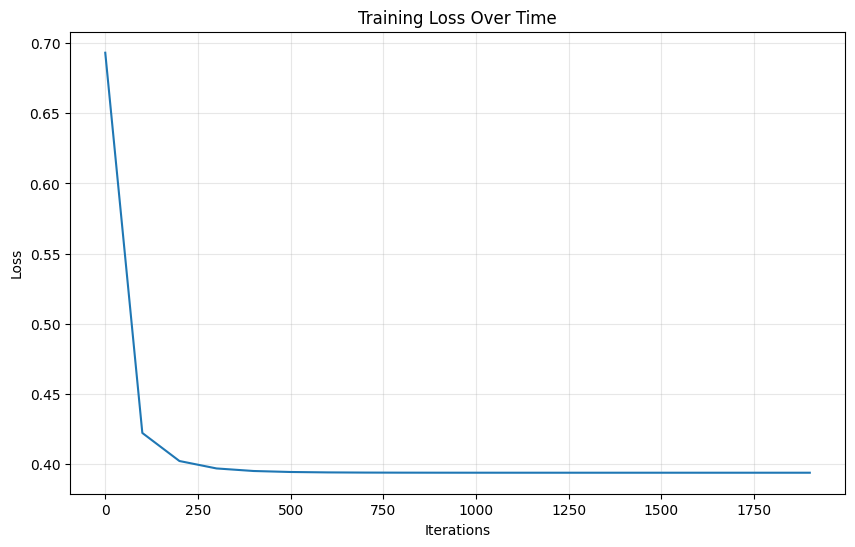

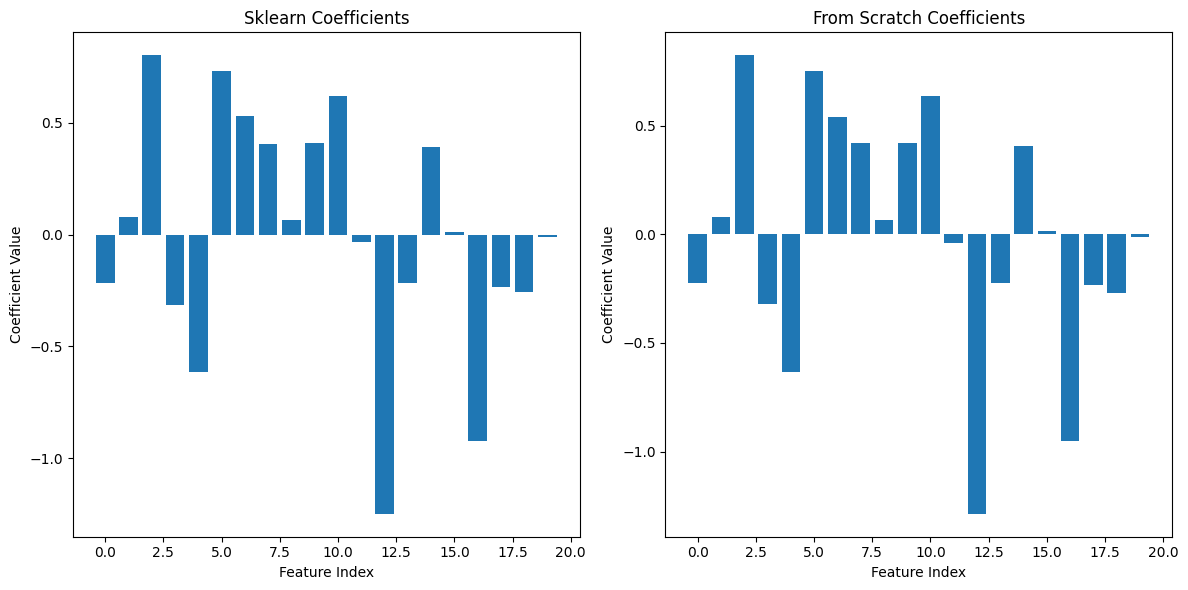

In [38]:
# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(0, log_reg_scratch.n_iterations, 100), log_reg_scratch.losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.grid(True, alpha=0.3)
plt.show()

# Compare coefficients
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(len(log_reg.coef_[0])), log_reg.coef_[0])
plt.title('Sklearn Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

plt.subplot(1, 2, 2)
plt.bar(range(len(log_reg_scratch.weights)), log_reg_scratch.weights)
plt.title('From Scratch Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

plt.tight_layout()
plt.show()